In [1]:
import numpy as np
from pyairtable import Table,Api
import pandas as pd
from pprint import pprint
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api = Api('patkECjZGaeJ3Rj2F.902a4dc39c614cbcba594a1d909db35a39dcd69f43d2bf692aaf32268c4d60d7')
tableMessages = api.table('appY85YsYveVhA1eC', 'Messages')
data=tableMessages.all()
fields = [record['fields'] for record in data]
df=pd.DataFrame(fields)

In [3]:
print(df.iloc[49])
type(df)

message            Salve Massimo, sono Davide Morra, co-founder d...
lead                                                   Massimo Miele
efficacy                                                         3.0
transparency                                                     3.0
coherence                                                        3.0
safety                                                           3.0
lead_data          54a2a5997468693fda81bd32 Massimo Miele 34 Sale...
fluency                                                          2.0
company_type                                              IT company
lead_title                                     Sales Account Manager
accuracy                                                         2.0
human alignment                                                  1.0
other              errori di grammatica, contemplare non è adatto...
company_data       NAMIRIAL S.P.A. namirial  15 namirial.com nami...
model                             

pandas.core.frame.DataFrame

In [4]:
#metrics_columns = ['accuracy', 'hallucination', 'efficacy', 'fluency', 'coherence', 'transparency', 'safety', 'human_alignment']
grouped_df=df.groupby(['model'])

In [5]:
columns = ['accuracy','hallucination','efficacy','fluency','coherence','transparency','safety','human alignment']
dff=grouped_df[columns]
new_dff=dff.mean().round(2)
print(dff.head)
# Iterating through each group and printing its content

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x12e13fb00>>


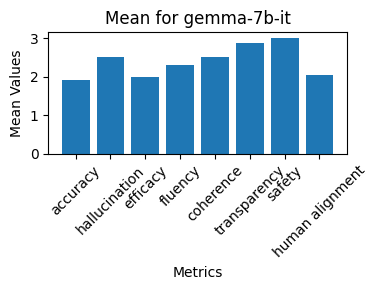

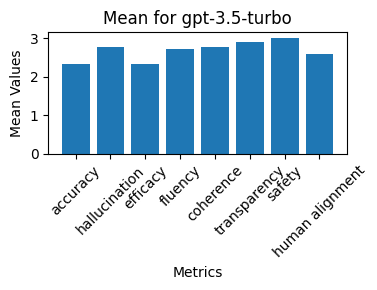

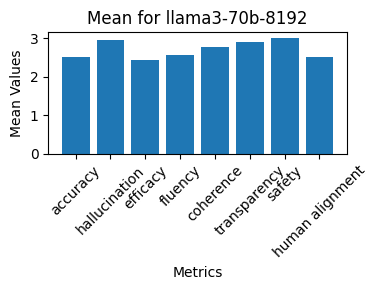

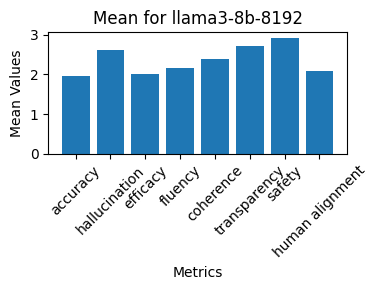

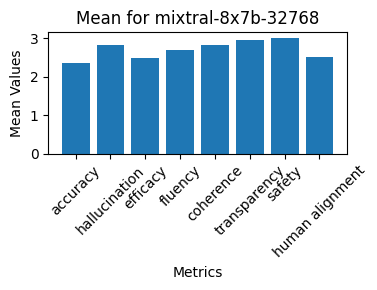

In [6]:
mean_dff=dff.mean().round(2)
for model in mean_dff.index:
    # Get mean values for the current model
    model_data = mean_dff.loc[model]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.bar(model_data.index, model_data.values)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Mean Values')
    ax.set_title(f'Mean for {model}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

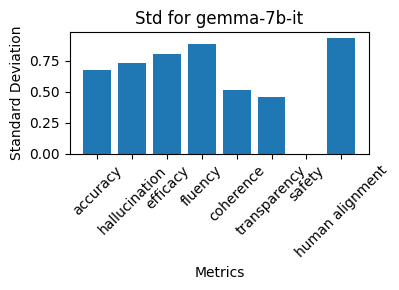

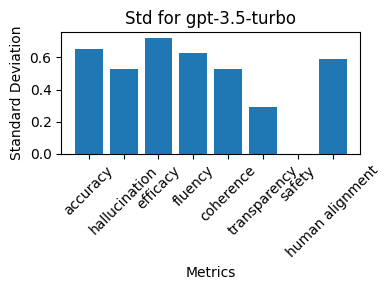

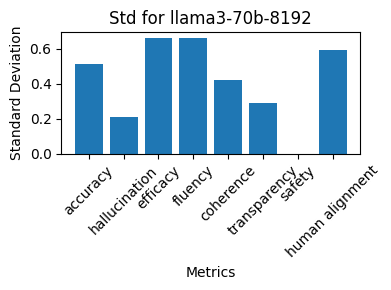

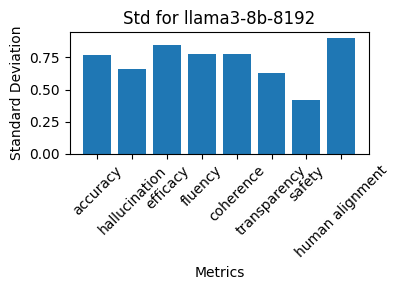

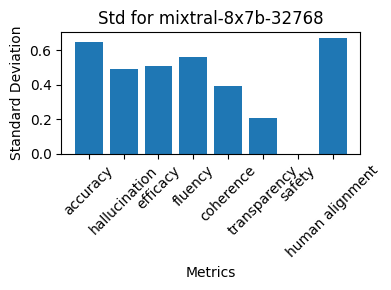

In [7]:
std_dff=dff.std().round(2)
for model in std_dff.index:
    global_mean=0
    # Get std_dev values for the current model
    model_data = std_dff.loc[model]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.bar(model_data.index, model_data.values)
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Standard Deviation')
    ax.set_title(f'Std for {model}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

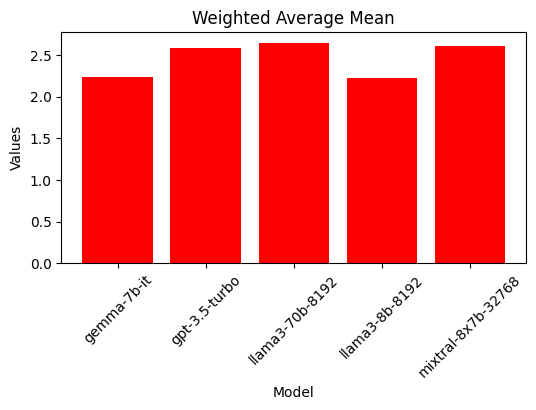

In [27]:
weights = {
    'accuracy': 0.3,
    'hallucination': 0.08,
    'efficacy': 0.08,
    'fluency': 0.1,
    'coherence': 0.08,
    'transparency': 0.08,
    'safety': 0.08,
    'human alignment': 0.2
}
weighted_sums = []
models = []
for model in mean_dff.index:
    model_data = mean_dff.loc[model]
    weighted_sum = 0
    for column, weight in weights.items():
        weighted_sum += model_data[column] * weight
    weighted_sums.append(weighted_sum)
    models.append(model)

plt.figure(figsize=(6, 3))
plt.bar(models, weighted_sums, color='red')
plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Weighted Average Mean')
plt.xticks(rotation=45)
plt.show()



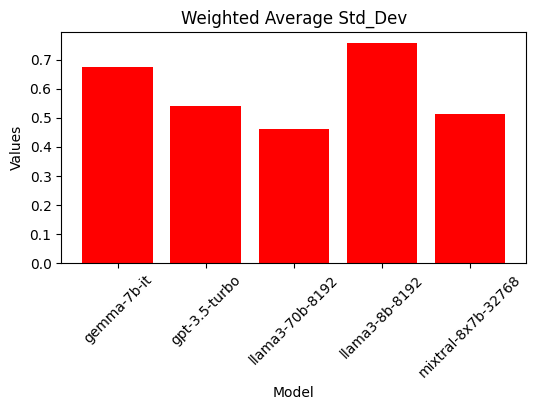

In [28]:
weights = {
    'accuracy': 0.3,
    'hallucination': 0.08,
    'efficacy': 0.08,
    'fluency': 0.1,
    'coherence': 0.08,
    'transparency': 0.08,
    'safety': 0.08,
    'human alignment': 0.2
}
weighted_sums = []
models = []
for m in std_dff.index:
    m_data = std_dff.loc[m]
    w_sum = 0
    for c, w in weights.items():
        w_sum += m_data[c] * w
    weighted_sums.append(w_sum)
    models.append(m)

plt.figure(figsize=(6, 3))
plt.bar(models, weighted_sums, color='red')
plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Weighted Average Std_Dev')
plt.xticks(rotation=45)
plt.show()
